In [20]:
import os
import csv
import json
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from tqdm import tqdm
from joblib import dump
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [4]:
# Mount Google Drive to access dataset
drive.mount('/content/drive', force_remount=True)

# Set up directory path
file_path = '/content/drive/MyDrive/Dataset Personality/data-final.csv'

Mounted at /content/drive


In [5]:
# Read CSV file into a Pandas DataFrame
df = pd.read_csv(file_path, sep='\t')

# Show the first 5 rows of the DataFrame
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0



# **Dataframe Description**
This data was collected (2016-2018) through an interactive on-line personality test. The personality test was constructed with the "Big-Five Factor Markers" from the IPIP. https://ipip.ori.org/newBigFive5broadKey.htm

All questions was labeled from one to five and these represent

1 = Disagree, 3 = Neutral, 5 = Agree

**These following questions will ask about extroversion or introversion :**

1.  EXT1	I am the life of the party. (extroversion)
2.  EXT2	I don't talk a lot. (introversion)
3.  EXT3	I feel comfortable around people. (extroversion)
4.  EXT4	I keep in the background. (introversion)
5.  EXT5	I start conversations. (extroversion)
6.  EXT6	I have little to say. (introversion)
7.  EXT7	I talk to a lot of different people at parties. (extroversion)
8.  EXT8	I don't like to draw attention to myself. (introversion)
9.  EXT9	I don't mind being the center of attention. (extroversion)
10. EXT10	I am quiet around strangers. (introversion)

**These following questions will ask about neurotic or emotionally_stable :**

1.  EST1	I get stressed out easily. (neurotic)
2.  EST2	I am relaxed most of the time. (emotionally_stable)
3.  EST3	I worry about things. (neurotic)
4.  EST4	I seldom feel blue. (emotionally_stable)
5.  EST5	I am easily disturbed. (neurotic)
6.  EST6	I get upset easily. (neurotic)
7.  EST7	I change my mood a lot. (neurotic)
8.  EST8	I have frequent mood swings. (neurotic)
9.  EST9	I get irritated easily. (neurotic)
10. EST10	I often feel blue. (neurotic)

**These following questions will ask about agreeable or competitiveness :**

1.  AGR1	I feel little concern for others. (competitiveness)
2.  AGR2	I am interested in people. (agreeable)
3.  AGR3	I insult people. (competitiveness)
4.  AGR4	I sympathize with others' feelings. (agreeable)
5.  AGR5	I am not interested in other people's problems. (competitiveness)
6.  AGR6	I have a soft heart. (agreeable)
7.  AGR7	I am not really interested in others. (competitiveness)
8.  AGR8	I take time out for others. (agreeable)
9.  AGR9	I feel others' emotions. (agreeable)
10. AGR10	I make people feel at ease. (agreeable)

**These following questions will ask about conscientious or spontaneity :**

1.  CSN1	I am always prepared. (conscientious)
2.  CSN2	I leave my belongings around. (spontaneity)
3.  CSN3	I pay attention to details. (conscientious)
4.  CSN4	I make a mess of things. (spontaneity)
5.  CSN5	I get chores done right away. (conscientious)
6.  CSN6	I often forget to put things back in their proper place. (spontaneity)
7.  CSN7	I like order. (conscientious)
8.  CSN8	I shirk my duties. (spontaneity)
9.  CSN9	I follow a schedule. (conscientious)
10. CSN10	I am exacting in my work. (conscientious)

**These following questions will ask about openess or consistency :**

1.  OPN1	I have a rich vocabulary. (openess)
2.  OPN2	I have difficulty understanding abstract ideas. (consistency)
3.  OPN3	I have a vivid imagination. (openess)
4.  OPN4	I am not interested in abstract ideas. (consistency)
5.  OPN5	I have excellent ideas. (openess)
6.  OPN6	I do not have a good imagination. (consistency)
7.  OPN7	I am quick to understand things. (openess)
8.  OPN8	I use difficult words. (openess)
9.  OPN9	I spend time reflecting on things. (consistency)
10. OPN10	I am full of ideas. (openess)

In [6]:
# Drop columns from 51 onwards
df.drop(df.columns[50:], axis=1, inplace=True)

# Show the first 5 rows of the DataFrame
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [7]:
# Count number of missing values in each column
num_missing = df.isnull().sum()

# Count number of rows with at least one missing value
num_rows_missing = df.isnull().any(axis=1).sum()

# Count total number of rows in the DataFrame
total_rows = df.shape[0]

# Calculate percentage of rows with at least one missing value
percent_rows_missing = (num_rows_missing / total_rows) * 100

print("\nNumber of rows with at least one missing value:", num_rows_missing)
print("Percentage of rows with at least one missing value: {:.2f}%".format(percent_rows_missing))


Number of rows with at least one missing value: 1783
Percentage of rows with at least one missing value: 0.18%


In [8]:
# Drop rows with missing values
df.dropna(inplace=True)

# Count number of missing values in each column
num_missing = df.isnull().sum()

# Count number of rows with at least one missing value
num_rows_missing = df.isnull().any(axis=1).sum()

print("Number of rows with at least one missing value:", num_rows_missing)

Number of rows with at least one missing value: 0


In [9]:
# Convert all columns to integer
df = df.astype(int)

# Show the first 5 rows of the DataFrame
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,...,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,...,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,...,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,...,4,2,5,2,3,1,4,4,3,3
4,3,3,3,3,5,3,3,5,3,4,...,5,1,5,1,5,1,5,3,5,5


In [10]:
# Menghapus baris yang mengandung nilai 0 pada setiap kolomnya
df = df.drop(df[df.eq(0).any(axis=1)].index)
df.shape

(874434, 50)

In [11]:
# define the columns to modify
cols_to_modify = ['EXT2','EXT4','EXT6','EXT8','EXT10',
                  'EST2','EST4',
                  'AGR1','AGR3','AGR5','AGR7',
                  'CSN2','CSN4','CSN6','CSN8',
                  'OPN2','OPN4','OPN6','OPN9']

# apply the transformation to each value in the specified columns
df[cols_to_modify] = df[cols_to_modify].apply(lambda x: 6 - x)

# print the updated dataframe
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,5,5,4,5,5,5,4,4,5,...,5,5,4,5,4,5,5,3,2,5
1,3,1,3,2,3,3,2,1,1,1,...,1,4,4,4,3,5,4,2,1,3
2,2,3,4,2,3,4,1,3,2,1,...,5,5,2,5,4,4,5,3,2,4
3,2,4,2,3,4,4,2,2,1,2,...,4,4,5,4,3,5,4,4,3,3
4,3,3,3,3,5,3,3,1,3,2,...,5,5,5,5,5,5,5,3,1,5


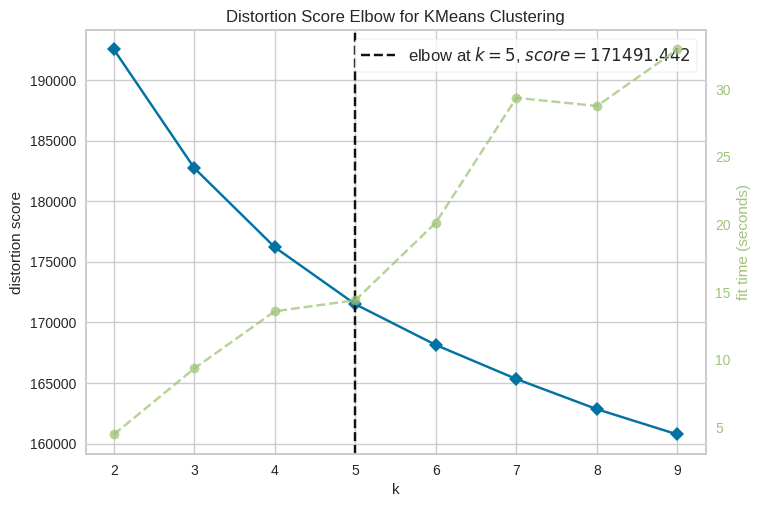

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_sample = df.iloc[:50000,:]
df_scaled = scaler.fit_transform(df_sample)
columns = df_sample.columns
df_scaled = pd.DataFrame(df_scaled, columns=columns)

# Visualize the elbow
kmeans = KMeans(n_init=25)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df_scaled)
visualizer.poof()

In [13]:
# create new columns
df['EXT'] = df.filter(regex='EXT\d+').sum(axis=1)
df['EST'] = df.filter(regex='EST\d+').sum(axis=1)
df['AGR'] = df.filter(regex='AGR\d+').sum(axis=1)
df['CSN'] = df.filter(regex='CSN\d+').sum(axis=1)
df['OPN'] = df.filter(regex='OPN\d+').sum(axis=1)

# normalize columns
cols_to_normalize = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
for col in cols_to_normalize:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# print the updated dataframe
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN6,OPN7,OPN8,OPN9,OPN10,EXT,EST,AGR,CSN,OPN
0,4,5,5,4,5,5,5,4,4,5,...,5,5,3,2,5,0.900,0.350,0.725,0.550,0.825
1,3,1,3,2,3,3,2,1,1,1,...,5,4,2,1,3,0.250,0.375,0.850,0.675,0.525
2,2,3,4,2,3,4,1,3,2,1,...,4,5,3,2,4,0.375,0.400,0.800,0.600,0.725
3,2,4,2,3,4,4,2,2,1,2,...,5,4,4,3,3,0.400,0.475,0.700,0.375,0.725
4,3,3,3,3,5,3,3,1,3,2,...,5,5,3,1,5,0.475,0.225,0.900,0.950,0.850


In [14]:
df = df.iloc[:, 50:]
df.head()

,EXT,EST,AGR,CSN,OPN
0,0.900,0.350,0.725,0.550,0.825
1,0.250,0.375,0.850,0.675,0.525
2,0.375,0.400,0.800,0.600,0.725
3,0.400,0.475,0.700,0.375,0.725
4,0.475,0.225,0.900,0.950,0.850


In [15]:
# mencari nilai maksimum pada setiap kolom
max_values = df.max()
print("Nilai maksimum pada setiap kolom:\n", max_values)

# mencari nilai minimum pada setiap kolom
min_values = df.min()
print("\nNilai minimum pada setiap kolom:\n", min_values)

Nilai maksimum pada setiap kolom:
 EXT    1.0
EST    1.0
AGR    1.0
CSN    1.0
OPN    1.0
dtype: float64

Nilai minimum pada setiap kolom:
 EXT    0.0
EST    0.0
AGR    0.0
CSN    0.0
OPN    0.0
dtype: float64


# **KMeans Clustering Method**

In [16]:
# melakukan standardisasi data
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# Fit KMeans model to the data
kmeans = KMeans(n_clusters=5, n_init=250)
kmeans.fit(df_std)

KMeans(n_clusters=5, n_init=250)

In [17]:
# Menyimpan model ke dalam file
dump(kmeans, 'model_kmeans.joblib')

['model_kmeans.joblib']

In [18]:
# get cluster labels
labels = kmeans.labels_

df['cluster'] = labels + 1
df.head()

,EXT,EST,AGR,CSN,OPN,cluster
0,0.900,0.350,0.725,0.550,0.825,2
1,0.250,0.375,0.850,0.675,0.525,5
2,0.375,0.400,0.800,0.600,0.725,1
3,0.400,0.475,0.700,0.375,0.725,2
4,0.475,0.225,0.900,0.950,0.850,1


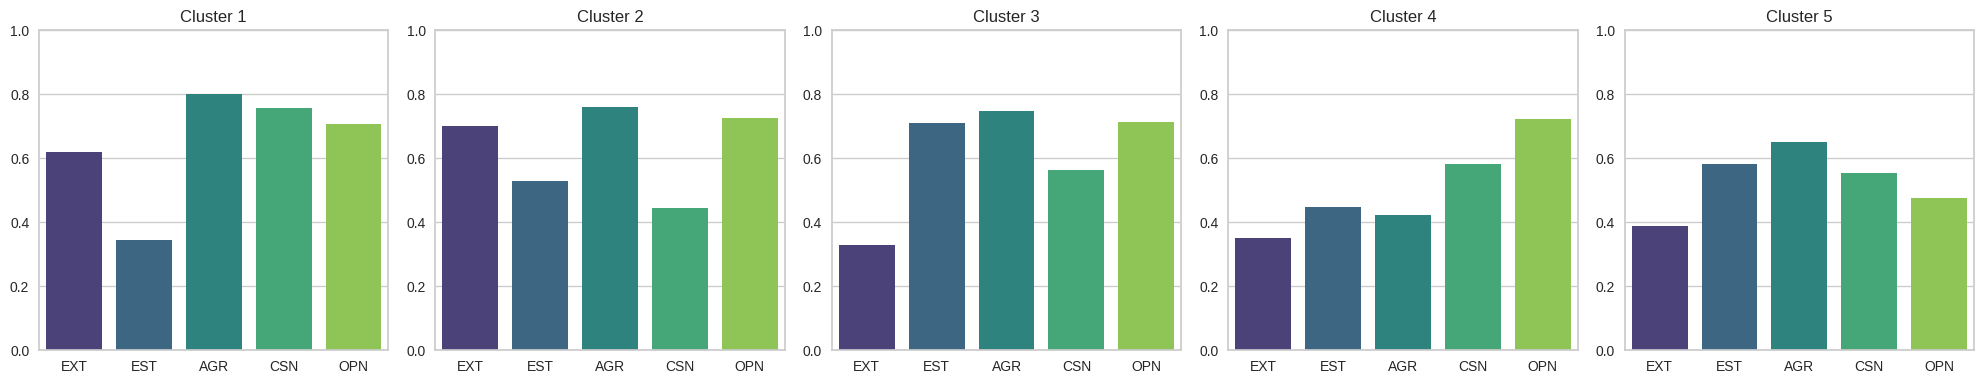

In [21]:
# Define the clusters
clusters = df['cluster'].unique()

# Create subplots for each cluster
fig, axs = plt.subplots(nrows=1, ncols=len(clusters), figsize=(20, 4))

# Loop through each cluster and plot the line plots for each column
for i, cluster in enumerate(sorted(clusters)):
    # Get the rows corresponding to the current cluster
    subset = df[df['cluster'] == cluster]
    # Calculate the mean for each column
    means = subset.mean()[:-1]
    # Plot the mean for each column
    sns.barplot(x=means.index, y=means, ax=axs[i], palette='viridis')
    axs[i].set_title(f'Cluster {cluster}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_ylim([0, 1])

plt.tight_layout()
plt.show()


In [27]:
cluster_means = []
for i, cluster in enumerate(sorted(clusters)):
    for col in df.columns[:-1]:
        mean = df[df['cluster'] == cluster][col].mean()
        cluster_means.append([cluster, col, mean])

df_cluster_means = pd.DataFrame(cluster_means, columns=['Cluster', 'Column', 'Mean'])
df_cluster_means.head(25)

,Cluster,Column,Mean
0,1,EXT,0.618717
1,1,EST,0.344242
2,1,AGR,0.800996
3,1,CSN,0.758537
4,1,OPN,0.708348
5,2,EXT,0.702440
6,2,EST,0.530602
7,2,AGR,0.759018
8,2,CSN,0.445521
9,2,OPN,0.727212


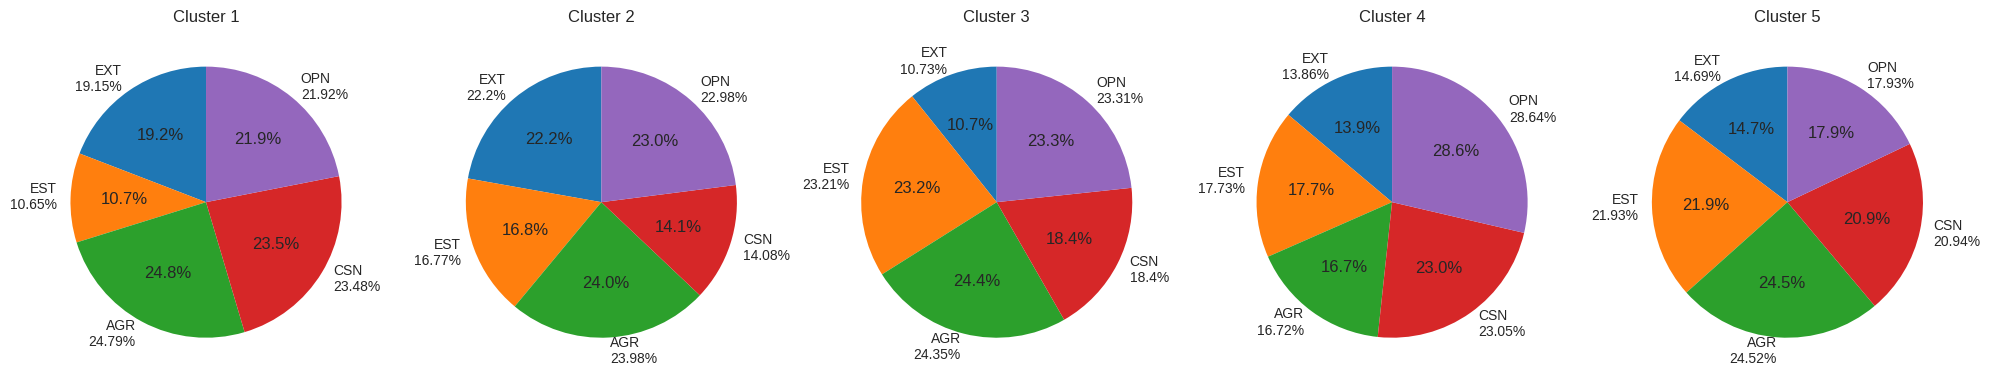

In [33]:
# Define the clusters
clusters = df['cluster'].unique()

# Set the color scheme
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create subplots for each cluster
fig, axs = plt.subplots(nrows=1, ncols=len(clusters), figsize=(20, 4))

# Loop through each cluster and plot the pie charts for each column
for i, cluster in enumerate(sorted(clusters)):
    # Get the rows corresponding to the current cluster
    subset = df[df['cluster'] == cluster]
    # Calculate the sum for each column
    sums = subset.sum()[:-1]
    # Calculate the percentage for each column
    percentages = [round((x/sums.sum())*100, 2) for x in sums]
    # Plot the pie chart for each column
    labels = [f'{col}\n{percentages[j]}%' for j, col in enumerate(sums.index)]
    axs[i].pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].set_title(f'Cluster {cluster}')
    axs[i].axis('equal')

plt.tight_layout()
plt.show()